<a href="https://colab.research.google.com/github/zbiswas3/Machine_learning_gatech/blob/master/Assignment_1/first_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import IPython
import numpy as np
import pandas as pd
from matplotlib import __version__ as plt_version
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pydotplus
%matplotlib inline

sns.set_style('whitegrid')
np.random.seed(42)

# imports for Decision Trees
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import graphviz

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit, learning_curve, validation_curve


# import for KNN
from sklearn.neighbors import KNeighborsClassifier

# import for SVM
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

# imports for Neural Network
import tensorflow as tf
import keras


Using TensorFlow backend.


In [2]:
# Requirements to run this code 
print("Anaconda Notebook version: ",IPython.__version__ )
print("numpy version: ", np.__version__)
print("pandas version: ",pd.__version__)
print("matplotlib version: ", plt_version)
print("Sci-kit Learn version: ", sklearn.__version__)
print("Seaborn version: ", sns.__version__)
print("Grphviz version", graphviz.__version__)
print("Tensorflow Version", tf.__version__)
print("Keras Version", keras.__version__)

Anaconda Notebook version:  5.5.0
numpy version:  1.14.6
pandas version:  0.22.0
matplotlib version:  3.0.2
Sci-kit Learn version:  0.20.2
Seaborn version:  0.7.1
Grphviz version 0.10.1
Tensorflow Version 1.13.0-rc0
Keras Version 2.2.4


## 1. Data Introduction ##

**Attribution Information**

Listing of attributes: 

\>50K, <=50K. 

    age: continuous.
    workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
    fnlwgt: continuous. 
    education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
    education-num: continuous. 
    marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
    occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
    relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
    race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
    sex: Female, Male. 
    capital-gain: continuous. 
    capital-loss: continuous. 
    hours-per-week: continuous. 
    native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [0]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
url_test = 'http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'

In [4]:
# load  the training data from 
train_data = pd.read_csv(url,
                         header=None,
                         names=['age', 'workclass','fnlwgt','education','education_num','maritalstatus',
                                'occupation','relationship','race','sex','capital_gain','capital_loss',
                                'hours_per_week','native_country', 'income'],
                         na_values = ' ?')
train_data.head()


,age,workclass,fnlwgt,education,education_num,maritalstatus,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# load  the training data from 
test_data = pd.read_csv(url_test,
                         header=None,
                         names=['age', 'workclass','fnlwgt','education','education_num','maritalstatus',
                                'occupation','relationship','race','sex','capital_gain','capital_loss',
                                'hours_per_week','native_country', 'income'],
                         na_values = ' ?')
test_data.head()

,age,workclass,fnlwgt,education,education_num,maritalstatus,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
maritalstatus     32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    31978 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16282 entries, 0 to 16281
Data columns (total 15 columns):
age               16282 non-null object
workclass         15318 non-null object
fnlwgt            16281 non-null float64
education         16281 non-null object
education_num     16281 non-null float64
maritalstatus     16281 non-null object
occupation        15315 non-null object
relationship      16281 non-null object
race              16281 non-null object
sex               16281 non-null object
capital_gain      16281 non-null float64
capital_loss      16281 non-null float64
hours_per_week    16281 non-null float64
native_country    16007 non-null object
income            16281 non-null object
dtypes: float64(5), object(10)
memory usage: 1.9+ MB


## 2. Data Preprocessing ##

In [0]:
def preprocess_data(data):
    ''' Change the categorical columns to numeric '''
    data = data.dropna()
    data = data.drop_duplicates()
    for column in data.columns:
        if data[column].dtype == object:
            data[column] = data[column].astype('category').cat.codes
    return data
    

In [0]:
train_df = preprocess_data(train_data)
test_df = preprocess_data(test_data)

In [8]:
print(train_df.shape)
train_df.head()

(30139, 15)


,age,workclass,fnlwgt,education,education_num,maritalstatus,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [9]:
print(test_df.shape)
test_df.head()

(15055, 15)


,age,workclass,fnlwgt,education,education_num,maritalstatus,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
1,8,2,226802.0,1,7.0,4,6,3,2,1,0.0,0.0,40.0,37,0
2,21,2,89814.0,11,9.0,2,4,0,4,1,0.0,0.0,50.0,37,0
3,11,1,336951.0,7,12.0,2,10,0,4,1,0.0,0.0,40.0,37,1
4,27,2,160323.0,15,10.0,2,6,0,2,1,7688.0,0.0,40.0,37,1
6,17,2,198693.0,0,6.0,4,7,1,4,1,0.0,0.0,30.0,37,0


## 3. Exploratory Data Analysis

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


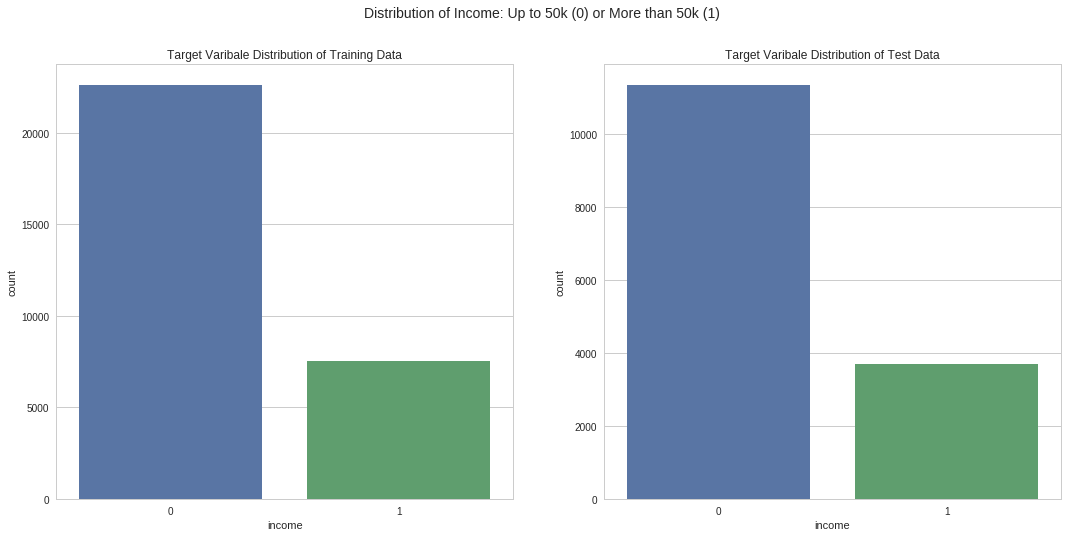

Test data: People with income more than 50k : 7506 
People with income 50k or less: 22633


In [12]:
plt.figure(figsize=(18, 8))
plt.subplot(121)
sns.countplot('income', data=train_df)
plt.title('Target Varibale Distribution of Training Data')

plt.subplot(122)
sns.countplot('income', data=test_df)
plt.title('Target Varibale Distribution of Test Data')

plt.suptitle('Distribution of Income: Up to 50k (0) or More than 50k (1)', size=14)
plt.show()
print("Test data: People with income more than 50k : {} \nPeople with income 50k or less: {}".format(sum(train_df.income), -sum(train_df.income-1)))

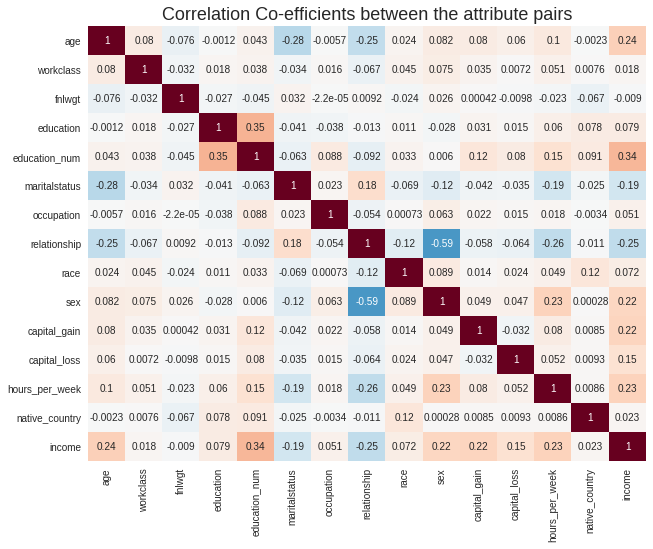

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_df.corr(), annot=True, annot_kws={'size':10}, cbar=False)
plt.title("Correlation Co-efficients between the attribute pairs", size=18)
plt.show()

In [0]:
# generating features and target variable for training and testing
X = train_df.drop(columns=['income'], axis=0)
y = train_df.income

X_test = test_df.drop(columns='income',axis=0)
y_test = test_df.income

# 4. Experiments and Results 

## Decision Trees
### Vanilla version of Decision trees Classifier with default parameters

In [11]:
clf = DecisionTreeClassifier()
%time clf.fit(X, y)
print("Accuracy Score for Training Data : ",clf.score(X, y))
print("Accuracy Score for Test Data: ",clf.score(X_test, y_test))

CPU times: user 204 ms, sys: 1.44 ms, total: 206 ms
Wall time: 208 ms
Accuracy Score for Training Data :  0.9999668203988188
Accuracy Score for Test Data:  0.8144138160079708


### Hyperparameter Tuning

In [0]:
# this is a modified version of plot_learning_curve from scikit learn website. 
# For the main structure all credit goes to the scikit learn authors 

def plot_learning_curve(estimator, X, y, ylim=None, cv=None, title="Learning Curves",
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), scoring=None):
    """
    Generate a simple plot of the test and training learning curve.
    
    """
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


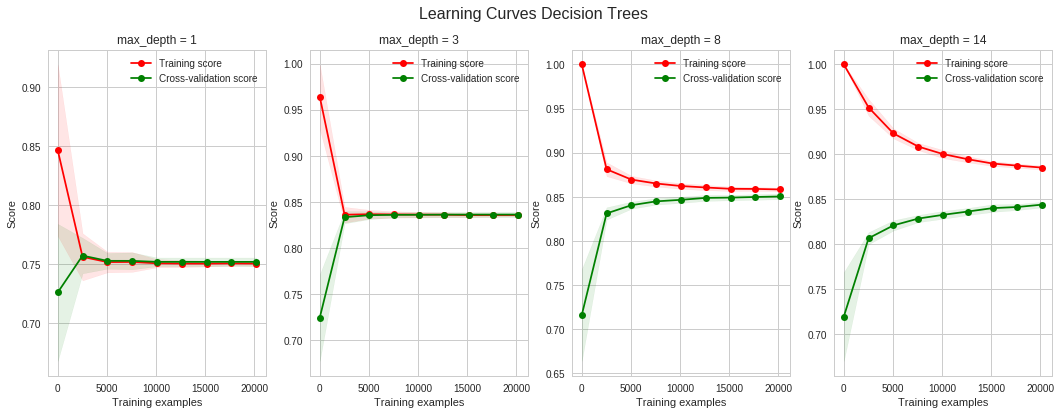

In [13]:
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 33% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.33, random_state=42)

# Generate the training set sizes
train_sizes = np.rint(np.linspace(25, X.shape[0]*0.67 - 1, 9)).astype(int)

# specify parameters 
depths = [1, 3, 8, 14]

# specify the classifiers with different parameters and plot the learning curves
plt.figure(figsize=(18, 6))
sub_cols = 140

for depth in depths:
    sub_cols = sub_cols+1
    plt.subplot(sub_cols)
    estimator = DecisionTreeClassifier(max_depth=depth, min_samples_split=0.001)
    plot_learning_curve(estimator, X, y, cv=cv,train_sizes=train_sizes)
    plt.title('max_depth = {}'.format(estimator.max_depth))

plt.suptitle("Learning Curves Decision Trees", size=16)
plt.show()

### Grid Search Cross Validation to Confirm the Best max_depth

In [0]:
searcher = GridSearchCV(estimator=DecisionTreeClassifier(),
                        param_grid={'min_samples_split':[0.001, 0.01, 0.03, 0.05],
                                    'max_depth':np.arange(3,10)},
                        cv=5, n_jobs=-1)

In [21]:
%time searcher.fit(X, y)
print('Best parameter', searcher.best_params_)
print("Training score after parameter tuning:", searcher.score(X, y))
print('Test score after parameter tuning:',searcher.score(X_test, y_test))

CPU times: user 512 ms, sys: 40.1 ms, total: 552 ms
Wall time: 6.93 s
Best parameter {'max_depth': 9, 'min_samples_split': 0.001}
Training score after parameter tuning: 0.8585553601645708
Test score after parameter tuning: 0.8277648621720358


In [0]:
# # warning: this code may take significant amount time to run
# dot_data = StringIO()
# export_graphviz(searcher.best_estimator_, out_file=dot_data, feature_names=X.columns.tolist())
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# Image(graph.create_png())

## Boosting Trees with Adaboost

In [21]:
clf_boost = AdaBoostClassifier(searcher.best_estimator_)
%time clf_boost.fit(X, y)
print(clf_boost.score(X, y))
print(clf_boost.score(X_test, y_test))

CPU times: user 6.24 s, sys: 0 ns, total: 6.24 s
Wall time: 6.24 s
0.9611798666180033
0.813284623048821


### Tuning Adaboost

In [0]:
searcher_boost = GridSearchCV(AdaBoostClassifier(searcher.best_estimator_),
                              param_grid={'n_estimators':[10, 250, 500], 'learning_rate':[0.01, 0.1, 1]},
                              cv=3, n_jobs=-1, scoring='precision')

In [18]:
%time searcher_boost.fit(X, y)
print('Best Parameters', searcher_boost.best_params_)
print('Accuracy on Training Data:', searcher_boost.best_score_)
print('Accuracy on Test Data:', searcher_boost.score(X_test, y_test))

CPU times: user 33.6 s, sys: 22.6 ms, total: 33.6 s
Wall time: 7min 55s
Best Parameters 0.8808444096950743
Accuracy on Training Data: 0.7617156799200777
Accuracy on Test Data: 0.8634232121922626


CPU times: user 314 ms, sys: 32.1 ms, total: 346 ms
Wall time: 12.3 s


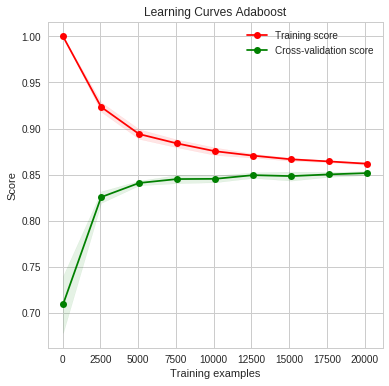

In [24]:
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 33% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.33, random_state=42)

# specify the classifiers with different parameters and plot the learning curves
plt.figure(figsize=(6, 6))

estimator = searcher_boost.best_estimator_
%time plot_learning_curve(estimator, X, y, cv=cv,train_sizes=train_sizes)
plt.title('Learning Curves Adaboost')
plt.show()

## KNN

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.fit_transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [25]:
# simple Knn with default parameters
knn = KNeighborsClassifier()
%time knn.fit(X_scaled,y)
print("Accuracy score on Train data:", knn.score(X_scaled,y))
print('Accuracy score on Test data:', knn.score(X_test_scaled, y_test))


CPU times: user 250 ms, sys: 1.85 ms, total: 252 ms
Wall time: 253 ms
Accuracy score on Train data: 0.8717276618335048
Accuracy score on Test data: 0.8174692793091995


### Hyper-parameter (n_neighbors) tuning

In [26]:
knn_searcher = GridSearchCV(knn, param_grid={'n_neighbors':np.arange(5,30)}, cv=5, n_jobs=-1)
%time knn_searcher.fit(X_scaled, y)
print('Best Parameters:', knn_searcher.best_params_)
print("Accuracy score on Train data:", knn_searcher.score(X_scaled, y))
print('Accuracy score on Test data:', knn_searcher.score(X_test_scaled, y_test))

CPU times: user 969 ms, sys: 87.5 ms, total: 1.06 s
Wall time: 10min 24s
Best Parameters: {'n_neighbors': 23}
Accuracy score on Train data: 0.8443213112578387
Accuracy score on Test data: 0.8290269013616739


KeyboardInterrupt: ignored

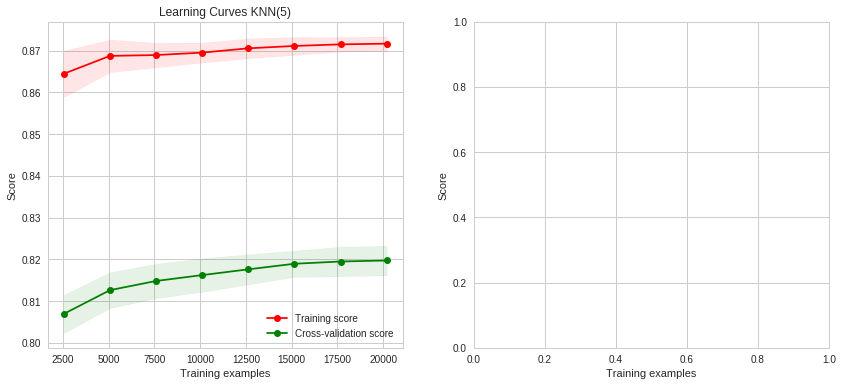

In [27]:
# Cross validation with 30 iterations to get smoother mean test and train
# score curves, each time with 33% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=30, test_size=0.33, random_state=42)

# specify the classifiers with different parameters and plot the learning curves
plt.figure(figsize=(14, 6))
subs = 120
for neighbor in [5, 40]:
  subs = subs + 1
  plt.subplot(subs)
  estimator = KNeighborsClassifier(n_neighbors=neighbor)
  plot_learning_curve(estimator, X_scaled, y, cv=cv,train_sizes=train_sizes[1:])
  plt.title('Learning Curves KNN({})'.format(neighbor))
plt.show()

In [0]:
estimator = knn_searcher.best_estimator_
plt.figure(figsize=(6, 6))
plot_learning_curve(estimator, X_scaled, y, cv=cv,train_sizes=train_sizes[1:])
plt.title('Learning Curves KNN')
plt.show()

## SVM 

### Linear kernel and Hyper-parameter tuning

In [30]:
svm_searcher = GridSearchCV(SVC(kernel='linear'), param_grid={'gamma':[0.001, 0.01, 0.1], 'C':[1, 10]}, cv=5, n_jobs=4)
svm_searcher.fit(X_scaled, y)
print('Best Parameters:', svm_searcher.best_params_)
print("Accuracy score on Train data:", svm_searcher.score(X_scaled, y))
print('Accuracy score on Test data:', svm_searcher.score(X_test_scaled, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best Parameters: {'C': 1, 'gamma': 0.001}
Accuracy score on Train data: 0.812535253326255
Accuracy score on Test data: 0.8104948522085685


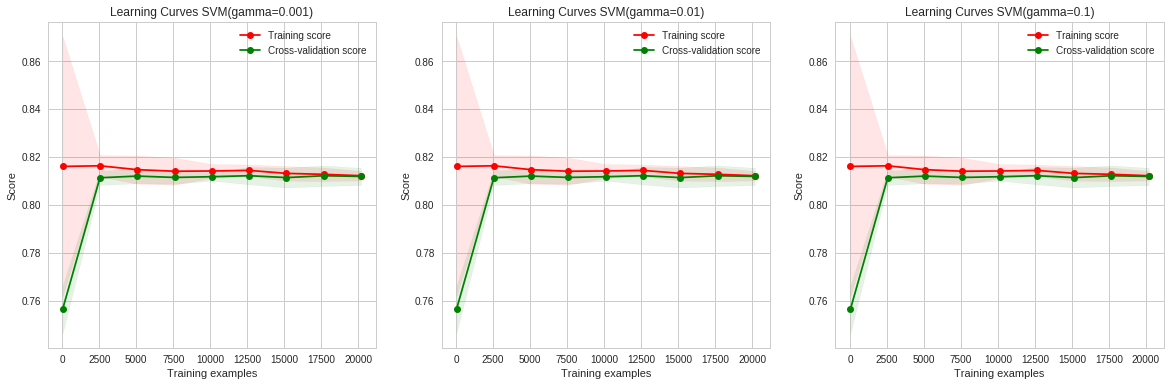

In [31]:
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 33% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.33, random_state=42)
subs = 130
# specify the classifiers with different parameters and plot the learning curves
plt.figure(figsize=(20, 6))
for gamma in [0.001, 0.01, 0.1]:
  subs = subs + 1
  estimator = svm_searcher.best_estimator_
  plt.subplot(subs)
  plot_learning_curve(estimator, X_scaled, y, cv=cv,train_sizes=train_sizes, n_jobs=3)
  plt.title('Learning Curves SVM(gamma={})'.format(gamma))
plt.show()


### 'rbf' kernel and Hyper-parameter tuning

In [32]:
rbf_searcher = GridSearchCV(SVC(kernel='rbf'), param_grid={'gamma':[0.001, 0.01, 0.1], 'C':[1, 10]}, cv=5, n_jobs=4)
%time rbf_searcher.fit(X_scaled, y)
print('Best Parameters',rbf_searcher.best_params_)
print("Accuracy score on Train data:", rbf_searcher.score(X_scaled, y))
print('Accuracy score on Test data:', rbf_searcher.score(X_test_scaled, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


CPU times: user 23.1 s, sys: 152 ms, total: 23.3 s
Wall time: 11min 56s
Best Parameters {'C': 10, 'gamma': 0.1}
Accuracy score on Train data: 0.8428945884070473
Accuracy score on Test data: 0.8419129857190302


CPU times: user 259 ms, sys: 15.9 ms, total: 275 ms
Wall time: 4min 13s


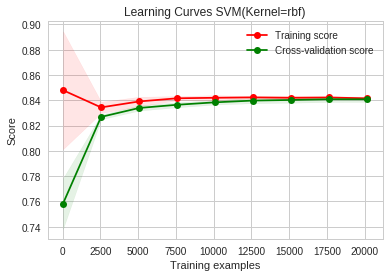

In [33]:
estimator = rbf_searcher.best_estimator_
%time plot_learning_curve(estimator, X_scaled, y, cv=cv,train_sizes=train_sizes, n_jobs=3)
plt.title('Learning Curves SVM(Kernel=rbf)')
plt.show()

## Deep Neural Network

In [0]:
from keras.models import Sequential, save_model
from keras.callbacks import EarlyStopping
from keras.layers import Dense
from keras.utils import to_categorical
from keras.optimizers import SGD, adam
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# X_test_scaled = scaler.fit_transform(X_test)

In [35]:
# early_stopping_monitor = EarlyStopping(patience=2)
input_shape = (X.shape[1],)

# Create the new model: model_2
model_1 = Sequential()

# Add the hidden layers
model_1.add(Dense(100, activation='relu', input_shape=input_shape))
model_1.add(Dense(100, activation='relu'))
model_1.add(Dense(100, activation='relu'))
model_1.add(Dense(100, activation='relu'))

# Add the output layer
model_1.add(Dense(2, activation='sigmoid'))



Instructions for updating:
Colocations handled automatically by placer.


### Effect of learning rate in optimization

Instructions for updating:
Use tf.cast instead.


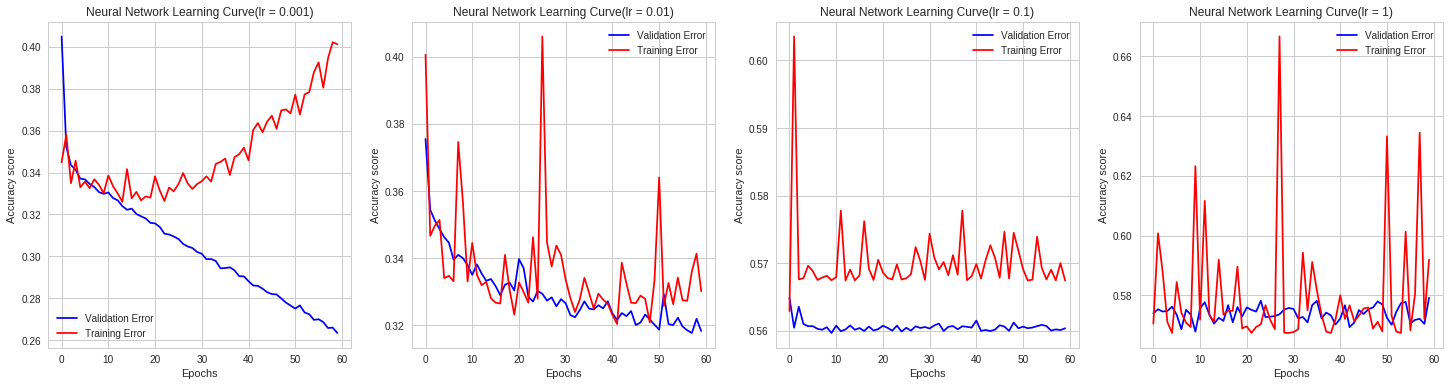

In [36]:
subs = 140
plt.figure(figsize=(25, 6))
for lr in [0.001, 0.01, 0.1, 1]:
  subs = subs+1
  # Compile model_2
  model_1.compile(optimizer=adam(lr=lr), loss='binary_crossentropy', metrics=['accuracy'],)
  # Fit model_1
  model_1_training = model_1.fit(X_scaled, to_categorical(y), epochs=60, validation_split=0.3, verbose=False)
  # Create the plot
  plt.subplot(subs)
  plt.plot(model_1_training.history['loss'], color='b', label='Validation Error')
  plt.plot(model_1_training.history['val_loss'], color='r',label='Training Error')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy score')
  plt.legend(loc='best')
  plt.title('Neural Network Learning Curve(lr = {})'.format(lr))
plt.show()


### Effect of number of layers

15055/15055 [==============================] - 0s 26us/step


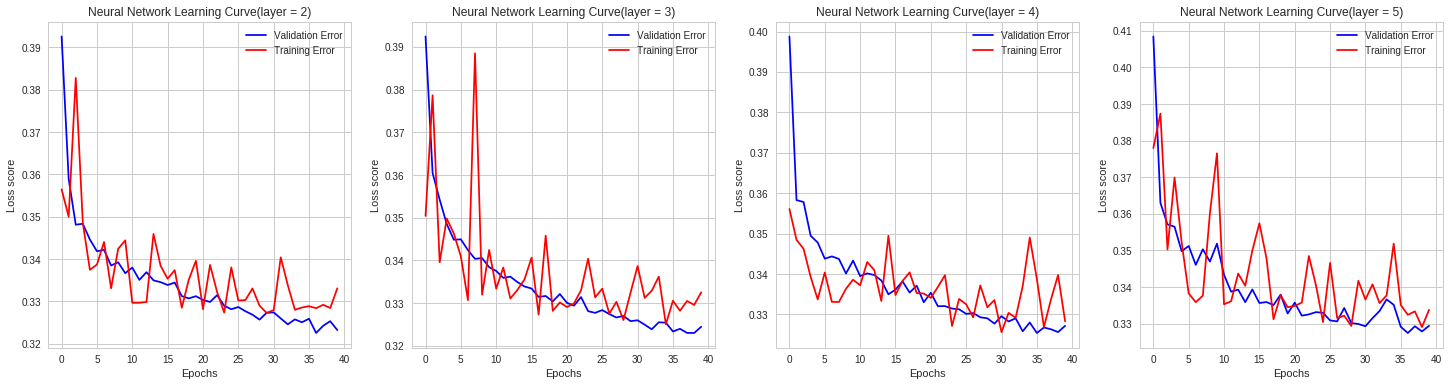

Test Accuracy scores: [0.8368316174147336, 0.8382597143885226, 0.8418797741693265, 0.8425107937601863]
Loss Scores: [0.33846800270487565, 0.33357473757725464, 0.33091269571968823, 0.33751601059149366]
Train Accuracy Scores: [0.8479871709930557, 0.8514709134619733, 0.8474894934353431, 0.8478212784254769]


In [37]:
early_stopping_monitor = EarlyStopping(patience=10)
input_shape = (X.shape[1],)
subs = 140
losses = []
accs = []
train_accs = []
plt.figure(figsize=(25, 6))
for layer in range(1,5):
  model = Sequential()
  # add first hidden layers
  model.add(Dense(100, activation='relu', input_shape=input_shape))  
  for l in range(layer):
    model.add(Dense(100, activation='relu'))
  model.add(Dense(2, activation='sigmoid'))
  subs = subs+1
  # Compile model
  model.compile(optimizer=adam(lr =0.01), loss='binary_crossentropy', metrics=['accuracy'])

  # Fit model_1
  model_training = model.fit(X_scaled, to_categorical(y), epochs=40, validation_split=0.3, verbose=False)
  loss, acc = model.evaluate(X_test_scaled, to_categorical(y_test))
  losses.append(loss)
  accs.append(acc)
  train_accs.append(max(model.history.history['val_acc']))
  
  # Create the plot
  plt.subplot(subs)
  plt.plot(model_training.history['loss'], color='b', label='Validation Error')
  plt.plot(model_training.history['val_loss'], color='r',label='Training Error')
  plt.xlabel('Epochs')
  plt.ylabel('Loss score')
  plt.legend(loc='best')
  plt.title('Neural Network Learning Curve(layer = {})'.format(layer+1))
plt.show()
print("Test Accuracy scores:", accs)
print("Loss Scores:", losses)
print("Train Accuracy Scores:", train_accs)

In [38]:
# Create the new model: model_2
model_tuned = Sequential()

# Add the hidden layers
model_tuned.add(Dense(100, activation='relu', input_shape=input_shape))
model_tuned.add(Dense(100, activation='relu'))
model_tuned.add(Dense(100, activation='relu'))

# Add the output layer
model_tuned.add(Dense(2, activation='sigmoid'))
# Compile model
model_tuned.compile(optimizer=adam(lr =0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Fit model
%time model_training = model.fit(X_scaled, to_categorical(y), epochs=40, validation_split=0.3, verbose=False,callbacks=[early_stopping_monitor])
loss, acc = model_tuned.evaluate(X_test_scaled, to_categorical(y_test), verbose=False)

CPU times: user 32.5 s, sys: 659 ms, total: 33.1 s
Wall time: 21.5 s


In [1]:
print("Test Accuracy:", acc)
print("Train Accuracy:", max(model_tuned.history['acc']))
print("Loss Score:", loss)

NameError: ignored